In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:83%; align: left; }</style>"))
display(HTML("<style>#toc-wrapper{ position: relative; width: 20%; top: 130px; left: 0px; }</style>"))

## 필요한 라이브러리 로드

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터셋 로드

In [71]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [72]:
df.head() #다 숫자로 되어있어서 전처리 불필요

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [73]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [74]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
    'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [75]:
y = df['Outcome']
y.shape

(768,)

In [76]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [77]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요
X_train.shape, y_train.shape

((614, 9), (614,))

In [78]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요
X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

### Single tree

In [79]:
# from sklearn.ensemble import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model

### Bagging

In [80]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model

### Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

## 학습과 예측하기

In [82]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [83]:
model.feature_importances_

array([1.06409948e-01, 7.36703076e-03, 6.58515012e-02, 3.75238192e-02,
       2.59581240e-02, 9.46974408e-02, 1.56708089e-04, 6.62035427e-01,
       0.00000000e+00])

In [84]:
feature_names = X_train.columns.tolist()

<Axes: >

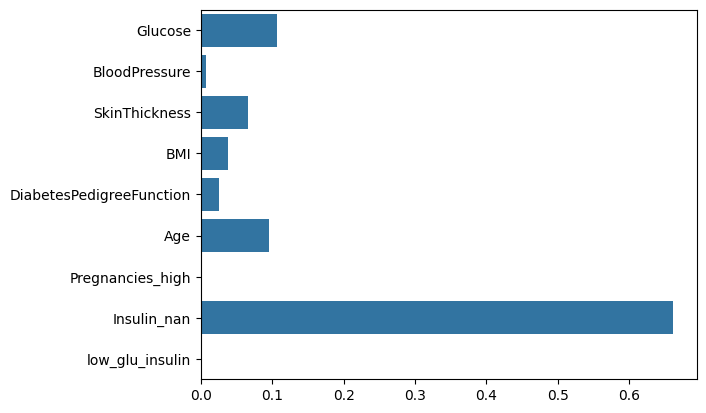

In [85]:
sns.barplot(x=model.feature_importances_, y = feature_names)

In [86]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [87]:
# 다르게 예측한 갯수를 구해서 diff_count에 할당해줍니다.
# DT : 28
# RF : 20
# GB : 24
(y_predict != y_test).sum()

24

In [88]:
# accuracy score를 구합니다.
# DT : 0.818
# RF : 0.870
# GB : 0.844
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8441558441558441